# Monte Carlo Estimation of π

### 1. Generate Random Coordinates for Monte Carlo Pi Estimation

In [72]:
import numpy as np

N = [10, 100, 1000, 10000, 100000, 1000000]

x = np.zeros(len(N), dtype=object)
y = np.zeros(len(N), dtype=object)

def rand_x_y_cords(N, x, y):
    for idx, n in enumerate(N):
        x[idx] = np.random.rand(n)
        y[idx] = np.random.rand(n)
    
rand_x_y_cords(N, x, y)

assert len(N) == len(x) == len(y)
assert True == isinstance(x, np.ndarray) == isinstance(y, np.ndarray)
for i in range(len(N)): assert N[i] == len(x[i]) == len(y[i])
    

## How the Algorithm Works:
The algorithm uses the Monte Carlo method to estimate the value of Pi by randomly generating points in a unit square. It checks how many of those points fall inside a quarter circle inscribed in the square. The ratio of points inside the quarter circle to the total number of points is used to approximate Pi.

### 2. Generate Pi Approximations Using a Monte Carlo Method for Increasing Numbers of Random Points

* Inputs:

    - A list N representing different numbers of random points (e.g., 10, 100, 1000, 10000, 100000, 1000000) for which Pi will be approximated.
    - Randomly generated x and y coordinates for each value in N.
    - inside_points, outside_points

* Output:

    - A list res containing the final Pi approximation for each corresponding number in N.
    - A list res_hist containing the running estimates of Pi as more random points are added, showing how the estimate converges.

In [73]:
def calculate_pi(N, x, y, inside_points, outside_points):
    def f(x, r): return np.sqrt(r**2 - x**2)
    res = []
    res_hist = []
    
    for i in range(len(N)):
        internal = 0
        inside_x, inside_y = [], []
        outside_x, outside_y = [], []
        est_list = []

        for j in range(N[i]):
            if y[i][j] <= f(x[i][j], 1):
                internal += 1
                inside_x.append(x[i][j])
                inside_y.append(y[i][j])
            else:
                outside_x.append(x[i][j])
                outside_y.append(y[i][j])
            est_list.append(4 * internal / (j+1))

            inside_points[i] = (inside_x, inside_y)
            outside_points[i] = (outside_x, outside_y)

        res.append(4 * internal / N[i])
        res_hist.append(est_list)
    
    return res, res_hist


inside_points = [None] * len(N)
outside_points = [None] * len(N)

result, result_hist = calculate_pi(N, x, y, inside_points, outside_points) 

print("Pi approximation for N random points in the unit square")
print("-------------------------------------------------------")
for idx, res in enumerate(result): print(f"{N[idx]} : {res}")


Pi approximation for N random points in the unit square
-------------------------------------------------------
10 : 2.8
100 : 3.32
1000 : 3.084
10000 : 3.17
100000 : 3.13568
1000000 : 3.14104


### 3. Visualizing Random Points and Pi Estimation:
The plot shows how random points are distributed in a unit square, with points inside the quarter circle (under the curve) marked in blue and points outside (above the curve) marked in red. The blue curve represents the quarter circle, and each subplot corresponds to a different number of points N.

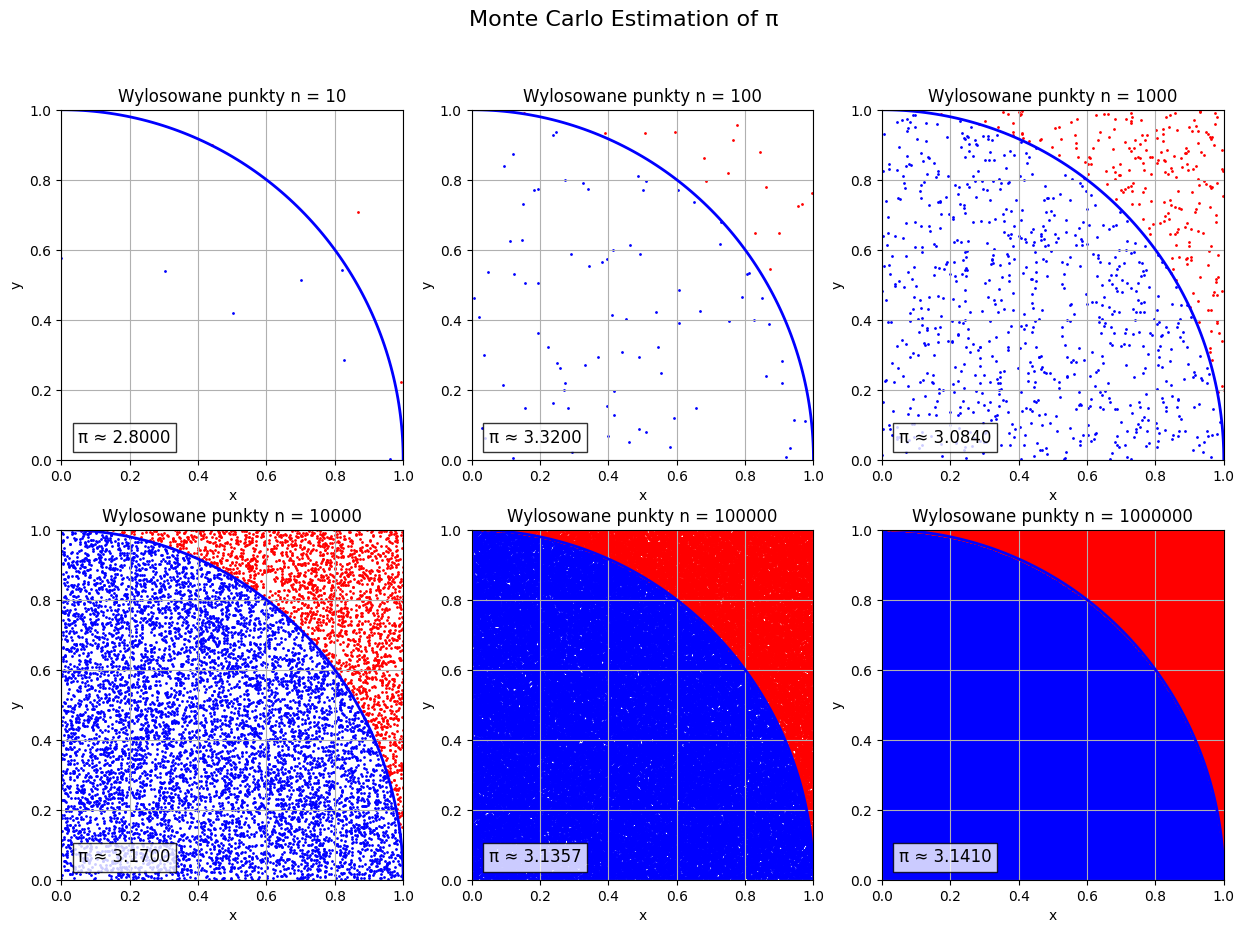

In [74]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Monte Carlo Estimation of π", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.scatter(inside_points[i][0], inside_points[i][1], color='blue', s=1)
    ax.scatter(outside_points[i][0], outside_points[i][1], color='red', s=1)

    theta = np.linspace(0, np.pi/2, 100)
    ax.plot(np.cos(theta), np.sin(theta), color='blue', linewidth=2)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.set_title(f"Wylosowane punkty n = {N[i]}")

    ax.text(0.05, 0.05, f"π ≈ {result[i]:.4f}", fontsize=12, color="black", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()


The plot demonstrates how the estimated value of Pi converges as the number of random points increases. The red dashed line represents the actual value of π. With each additional point, the estimates gradually approach this value.

The process is repeated 10 times

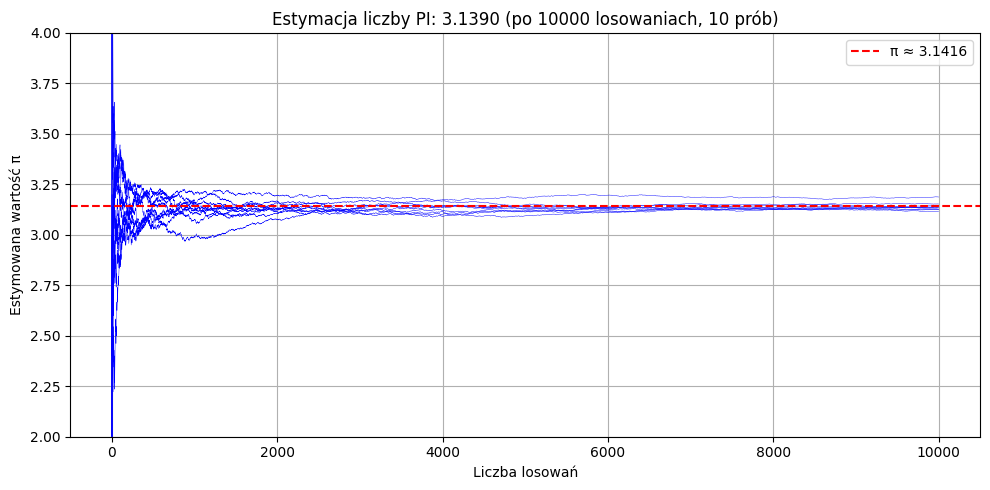

In [75]:
num_simulations = 10
num_points = 10000

N = [num_points] * num_simulations
x = [None] * num_simulations
y = [None] * num_simulations
inside_points = [None] * num_simulations
outside_points = [None] * num_simulations

rand_x_y_cords(N, x, y)
res, res_hist = calculate_pi(N, x, y, inside_points, outside_points)

plt.figure(figsize=(10, 5))

for estimation in res_hist: plt.plot(estimation, color='blue', alpha=1, linewidth=0.3)

plt.axhline(y=3.1416, color='red', linestyle='--', label='π ≈ 3.1416')

plt.title(f'Estymacja liczby PI: {np.mean(res):.4f} (po {num_points} losowaniach, {num_simulations} prób)')
plt.xlabel('Liczba losowań')
plt.ylabel('Estymowana wartość π')
plt.ylim(2, 4)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This code generates a boxplot to visualize the distribution of Pi estimates for different values of N (e.g., 100, 1000, 10000, 100000 random points)

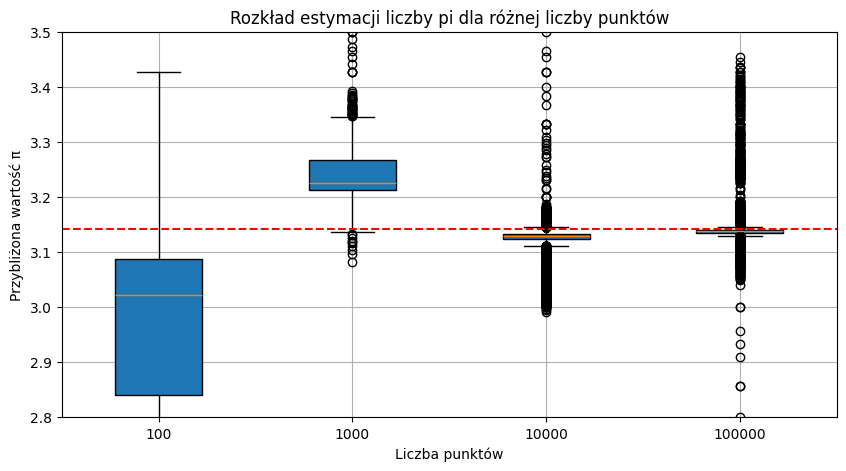

In [ ]:
N = [100, 1000, 10000, 100000]
rand_x_y_cords(N, x, y)
result, result_hist = calculate_pi(N, x, y, inside_points, outside_points) 

plt.figure(figsize=(10, 5))
plt.boxplot(result_hist, tick_labels=N, patch_artist=True)

plt.axhline(y=3.1416, color='red', linestyle='--')

plt.title("Rozkład estymacji liczby pi dla różnej liczby punktów")
plt.xlabel("Liczba punktów")
plt.ylabel("Przybliżona wartość π")
plt.grid(True)
plt.ylim(2.8, 3.5)
plt.show()

## Summary
Using the Monte Carlo method to estimate the value of Pi demonstrates that as the number of random points increases, the accuracy of the Pi approximation improves. The scatter plots and boxplots show how estimates converge toward the true value of Pi (3.1416). With fewer points, the estimates vary widely, but as more points are generated, the estimates become more stable and precise, reducing the error. This highlights the strength of the Monte Carlo method for approximating Pi, especially when working with a large number of random points.